# Toronto Housing Prices GeoVisualization

### Installing Required Packages 

In [1]:
!pip install numpy
!conda install -c conda-forge geopandas --yes
!pip install pandas


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.6.11

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [2]:
!pip install plotly
!pip install shapely

### Importing The Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd                         #We will use geopandas to visualize our mapping plot 
import plotly as py
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from shapely.geometry import Point,Polygon

In [4]:
!pip install seaborn

In [5]:
import seaborn as sns

### Reading Our Shapefile

Firsty, we will import our shapefile of the city map of Toronto, divided into all of its wards/neighbourhoods. We can then visualize our map using the pandas Dataframe

In [6]:
toronto = gpd.read_file("citygcs.ward_2018_wgs84.shp")           #Reading our shapefile
toronto.head()                                                   #Plotting our shapefile dataframe

,AREA_ID,DATE_EFFEC,DATE_EXPIR,AREA_ATTR_,AREA_TYPE_,PARENT_ARE,AREA_TYPE,AREA_CLASS,AREA_CLA_1,AREA_SHORT,...,TRANS_ID_C,TRANS_ID_E,X,Y,LONGITUDE,LATITUDE,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry
0,2424612,2018-01-12,3000-01-01,26098170,895,0,WD18,634,WD18,43,...,217160.0,-1.0,319990.823,4851777.169,-79.310999,43.807802,16013319,0.0,0.0,POLYGON ((-79.27740093900002 43.80570624000001...
1,2424619,2018-01-12,3000-01-01,26098177,895,0,WD18,634,WD18,25,...,217160.0,-1.0,313836.205,4836370.680,-79.387751,43.669225,16013207,0.0,0.0,POLYGON ((-79.37685429200002 43.67235854699999...
2,2424620,2018-01-12,3000-01-01,26098178,895,0,WD18,634,WD18,23,...,217160.0,-1.0,315429.547,4835855.215,-79.368004,43.664564,16013191,0.0,0.0,"POLYGON ((-79.35971084699997 43.67046188, -79...."
3,2424621,2018-01-12,3000-01-01,26098179,895,0,WD18,634,WD18,24,...,217160.0,-1.0,312779.088,4835600.136,-79.400871,43.662302,16013175,0.0,0.0,"POLYGON ((-79.39049459900002 43.659858837, -79..."
4,2424622,2018-01-12,3000-01-01,26098180,895,0,WD18,634,WD18,36,...,217160.0,-1.0,317831.086,4834875.080,-79.338250,43.655704,16013159,0.0,0.0,"POLYGON ((-79.31956485799998 43.651280719, -79..."


### Plotting Our Shapefile of Toronto

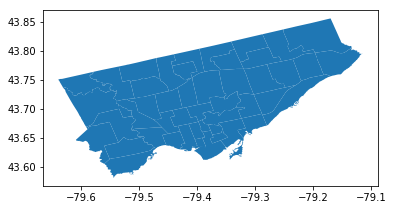

In [28]:
toronto.plot()                                              #Plotting our Toronto Map shapefiel

### Importing Our Housing Price Dataset

Using the pandas dataframe once more, we can read our second data set,which contains all of our housing price data that we will overlay on top of our shapefile that we imported above

In [8]:
df = pd.read_csv("properties_edited.csv")                  #Reading our dataset for Housing prices 
df.head()                                                  #Printing our Housing Prices dataframe 

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


### Using Housing Price Dataset Coordinates To Map To Our GeoDataframe

Using the vairables 'lat' for latitude and 'lng' for longitude from the data set imported we can assosiacte their respective values for each index in the dataframe as a point

In [9]:
geometry = [Point(xy) for xy in zip(df['lng'],df['lat'])]           #Assigning our latitudes and longitudes to geometric coordinate

Using our GeoPandas dataframe we can pass our geometric array of points and map it to actual coordinates. I.e. we are storing our values in the vairable 'geometry' 

In [10]:
geo_df = gpd.GeoDataFrame(df,geometry=geometry)                     #Using GeoDataFrame to create dataframe from coordinates matched

geo_df.head()                                                      #Printing our new dataframe 

,Unnamed: 0,Address,AreaName,Price ($),lat,lng,geometry
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,POINT (-79.54426600000001 43.679882)
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,POINT (-79.90439599999999 43.25)
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,POINT (-79.91935699999999 43.25169)
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,POINT (-79.767403 43.227161)
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,POINT (-79.36811800000001 43.651478)


### Visualizing Our Data 

Now that we hae all of our data set up and ready, we can visualize our points on toop of the Toronto map shapefile by overlaying the two maps on top of eachother

Setting our plot x and y dimensions/limits, that way we can focus our visualizing on the points pertaining to the Toronto Map.
We will also set our x,y, axis and our plot title. Finally we create a colour bar to act as our legend for our Housing Prices and overlay the two maps on top of eachother

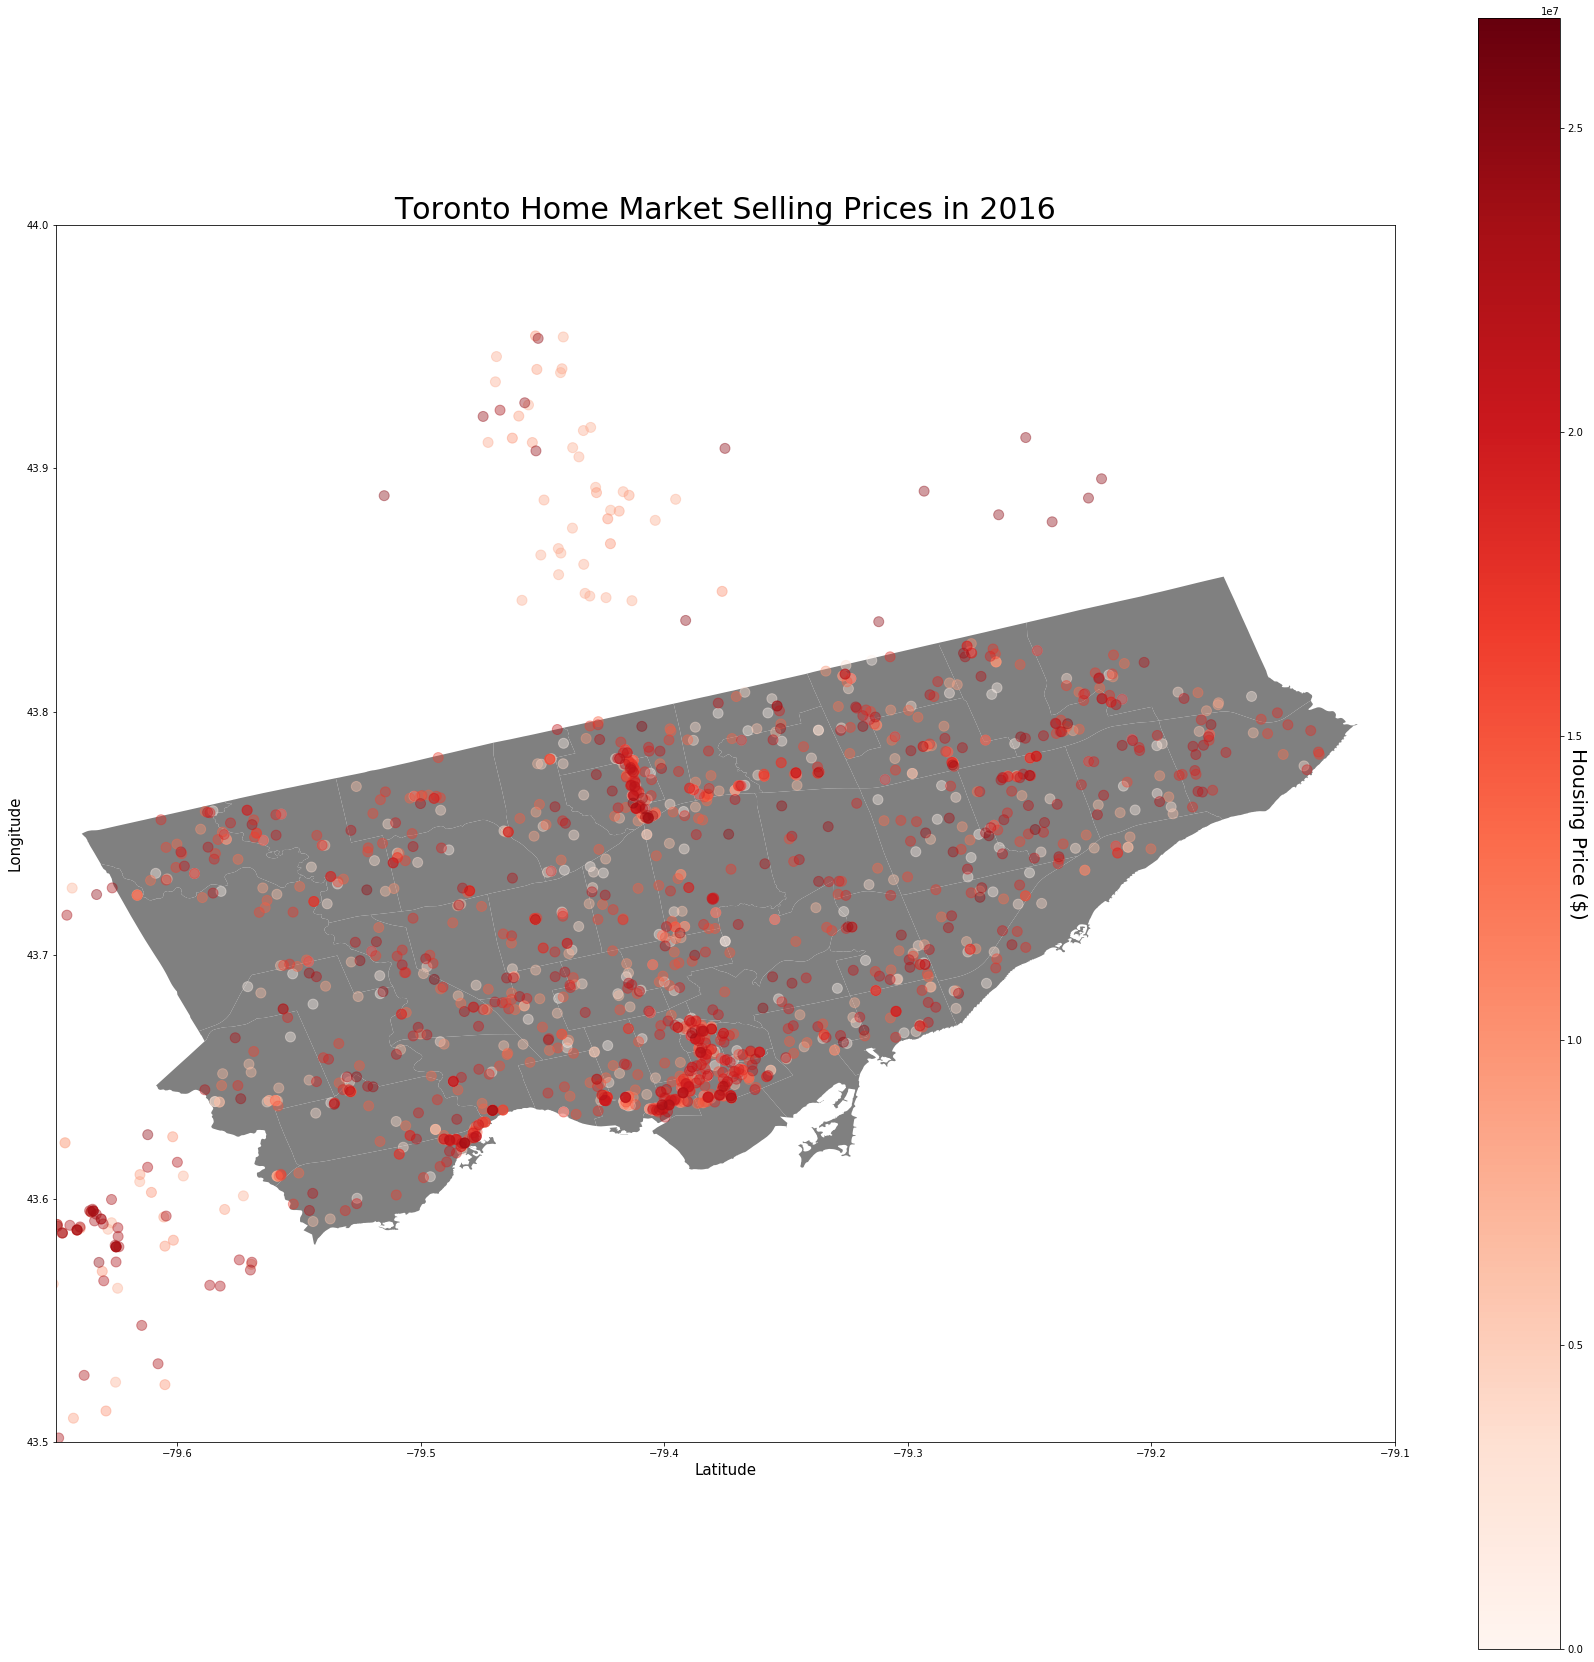

In [53]:
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 30))

#Setting our x and ylimits or our plot below
axes = plt.gca()
axes.set_xlim([-79.65,-79.1])
axes.set_ylim([43.5,44.0])

#Setting our figure x and y label as well as our title 
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)
plt.title('Toronto Home Market Selling Prices in 2016', fontsize = 30)

#Creating our custom colourbar
norm = Normalize(vmin=geo_df['Price ($)'].min(), vmax=geo_df['Price ($)'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='Reds')
n_cmap.set_array([])
bar = ax.get_figure().colorbar(n_cmap)
bar.set_label('Housing Price ($)', rotation=270, fontsize = 20) 


#Overlaying our dataset of housing prices over top our shapfile or Toronto map 
toronto.plot(ax=ax, color='grey')
housing = geo_df.plot(ax=ax, c='Price ($)', colormap='Reds',alpha=0.4, markersize = 100 )

Plot the two maps on top of eachother